<a href="https://colab.research.google.com/github/GPT4chan/GPT4Chan-Colab/blob/main/GPT_4Chan_GGML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

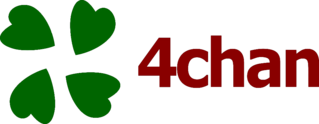

## Bienvenido al notebook personalizado de KoboldCpp para Google Colab!
este notebook tiene por defecto el modelo "GPT-4Chan GGML"

Es realmente fácil empezar. Simplemente presione los dos botones **Reproducir** a continuación y luego conéctese a la **URL de Cloudflare** que se muestra al final.
También puedes cambiar la URL del modelo para usar cualquier modelo GGUF de Huggingface.

In [ ]:
#@title <-- Toca aqui si estas desde tu celular { display-mode: "form" }
%%html
<b>Press play on the music player to keep the tab alive, then start KoboldCpp below</b><br/>
<audio src="https://raw.githubusercontent.com/KoboldAI/KoboldAI-Client/main/colab/silence.m4a" controls>

In [ ]:
#@title <b>v-- Ingrese su modelo a continuación y luego haga clic aquí para comenzar Koboldcpp</b>

Model = "https://huggingface.co/autobots/gpt-j-fourchannel-4bit/resolve/main/GPT-J-FourChannel-4bit.safetensors" #@param [""]{allow-input: true}
Layers = 43 #@param [43]{allow-input: true}
ContextSize = 4096 #@param [4096] {allow-input: true}

%cd /content
!git clone https://github.com/LostRuins/koboldcpp
%cd /content/koboldcpp
kvers = !(cat koboldcpp.py | grep 'KcppVersion = ' | cut -d '"' -f2)
kvers = kvers[0]
!echo Finding prebuilt binary for {kvers}
!wget -c https://huggingface.co/concedo/koboldcpp/resolve/main/prebuilt_binaries/{kvers}.so
!test -f {kvers}.so && mv {kvers}.so koboldcpp_cublas.so || echo Prebuilt Binary Does Not Exist
!test -f koboldcpp_cublas.so && echo Prebuilt Binary Exists || make koboldcpp_cublas LLAMA_CUBLAS=1
!cp koboldcpp_cublas.so koboldcpp_cublas.dat
!wget $Model -O model.ggml
!wget -c https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64
!chmod +x cloudflared-linux-amd64
!nohup ./cloudflared-linux-amd64 tunnel --url http://localhost:5001 &
!sleep 8
!cat nohup.out
!python koboldcpp.py model.ggml --usecublas 0 mmq --multiuser --gpulayers $Layers --contextsize $ContextSize --hordeconfig concedo 1 1 --onready "echo Connect to the link below && cat nohup.out | grep trycloudflare.com && rm nohup.out"
